In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
conn = sqlite3.connect("hr.db")
df.to_sql("employees", conn, if_exists="replace", index=False)
pd.read_sql_query("SELECT * FROM employees LIMIT 5", conn)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
query = open("queries/09_avg_satisfaction_by_department.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,avg_satisfaction
0,management,0.621349
1,RandD,0.619822
2,product_mng,0.619634
3,marketing,0.618601
4,support,0.618300
5,IT,0.618142
6,sales,0.614447
7,technical,0.607897
8,hr,0.598809
9,accounting,0.582151


In [7]:
query = open("queries/10_left_by_department.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,total_employees,employees_left,left_percentage
0,hr,739,215,29.09
1,accounting,767,204,26.60
2,technical,2720,697,25.63
3,support,2229,555,24.90
4,sales,4140,1014,24.49
5,marketing,858,203,23.66
6,IT,1227,273,22.25
7,product_mng,902,198,21.95
8,RandD,787,121,15.37
9,management,630,91,14.44


In [8]:
query = open("queries/11_salary_distribution.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [9]:
query = open("queries/01_high_salary_employees.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,salary,satisfaction_level
0,product_mng,high,0.45
1,hr,high,0.09
2,technical,high,0.44
3,technical,high,0.45
4,marketing,high,0.37
...,...,...,...
1232,marketing,high,0.45
1233,support,high,0.43
1234,hr,high,0.45
1235,RandD,high,0.43


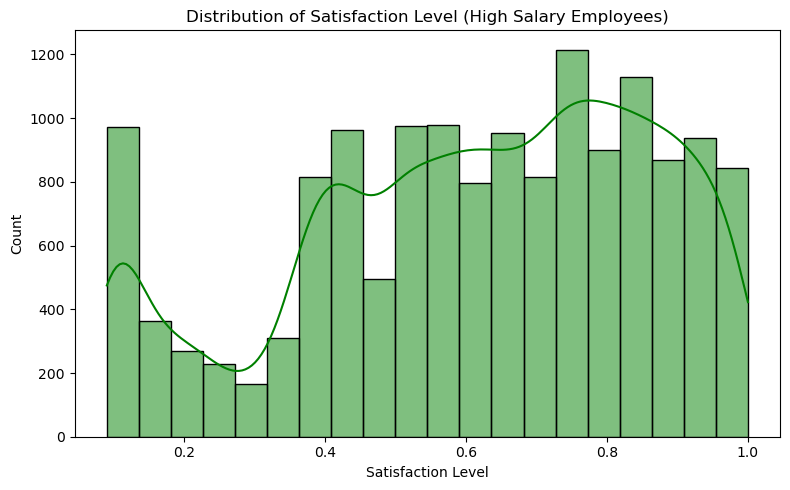

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["satisfaction_level"], kde=True, bins=20, color='green')
plt.title("Distribution of Satisfaction Level (High Salary Employees)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
query = open("queries/02_total_employees_stayed.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,number_employees_stayed
0,11428


In [12]:
query = open("queries/03_average_monthly_hours.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,total_average_monthly_hours
0,201.050337


In [13]:

query = open("queries/04_average_evaluation.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,average_evaluation
0,IT,0.716830
1,RandD,0.712122
2,accounting,0.717718
3,hr,0.708850
4,management,0.724000
5,marketing,0.715886
6,product_mng,0.714756
7,sales,0.709717
8,support,0.723109
9,technical,0.721099


In [16]:

query = open("queries/05_work_accidents_by_department.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,work_accident
0,IT,164
1,RandD,134
2,accounting,96
3,hr,89
4,management,103
5,marketing,138
6,product_mng,132
7,sales,587
8,support,345
9,technical,381


In [17]:
query = open("queries/06_promotion_rate_by_department.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,promotion_rate
0,IT,0.24
1,RandD,3.43
2,accounting,1.83
3,hr,2.03
4,management,10.95
5,marketing,5.01
6,product_mng,0.00
7,sales,2.42
8,support,0.90
9,technical,1.03


In [22]:
query = open("queries/07_low_salary_left_rate.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,low_left_percentage
0,14.481


In [24]:
query = open("queries/08_saticfaction_rate_left_stayed_by_dep.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,Department,left_satisfaction_level,stayed_satisfaction_level
0,IT,0.411868,0.677170
1,RandD,0.432810,0.653799
2,accounting,0.402598,0.647211
3,hr,0.433395,0.666679
4,management,0.422857,0.654861
5,marketing,0.453153,0.669878
6,product_mng,0.481566,0.658466
7,sales,0.447663,0.668548
8,support,0.450901,0.673799
9,technical,0.432525,0.668319


In [25]:

query = open("queries/12_left_rate_by_workload.sql").read()
df_result = pd.read_sql_query(query, conn)
df_result

,number_project,hours_range,total_employees,employees_left,left_percentage
0,7,0-150,3,3,100.00
1,7,151-200,4,4,100.00
2,7,201-250,27,27,100.00
3,7,251+,222,222,100.00
4,6,251+,634,539,85.02
5,2,0-150,1265,1043,82.45
6,2,151-200,774,492,63.57
7,5,251+,670,258,38.51
8,6,201-250,269,91,33.83
9,5,201-250,1032,325,31.49
